# Modsim Project 3 - Maia Materman, SeungU Lyu

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Question

Jupiter is the second heaviest planet body in the solar system, right after the sun. Even though its mass is relatively small compared to the sun's mass (about 0.001% of sun's mass), the effect it has toward other planets in the solar system is huge. Even now, it attracts most of the asteroids inside the solar system so that it cannot pass through toward the earth. There was an interesting hypothesis that if Jupiter's mass was about 100 times higher than it was at the creation, it might have started nuclear fusion by itself, and evolve into a star instead. If this happened, the solar system could have become a binary star system which is actually common thinking of other stars in the universe. However, earth might have not made its way into the Habitable Zone due to massive gravity that exist in binary solar system, not being able to create its own life. 

For this question, we thought it might be really interesting if for some reason, Jupiter starts the nuclear fusion process and becomes a star that has about the same mass as the sun. 

In [2]:
r_e = 147e9
r_j = 778e9
init_jupiter_mass = 1.898e27

init = State(x_e = r_e, y_e = 0 , vx_e = 0 , vy_e = 29784,
             x_s = 0 , y_s = 0 , vx_s = 0 , vy_s = 0 ,
             x_j = r_j, y_j = 0 , vx_j = 0 , vy_j = 13069 , m_j = init_jupiter_mass)

,values
x_e,1.470000e+11
y_e,0.000000e+00
vx_e,0.000000e+00
vy_e,2.978400e+04
x_s,0.000000e+00
y_s,0.000000e+00
vx_s,0.000000e+00
vy_s,0.000000e+00
x_j,7.780000e+11
y_j,0.000000e+00


In [3]:
system = System(init=init,
                G=6.674e-11,
                m_s=1.989e30, 
                m_e=5.972e24,
                t_0=0,
                t_end= 3.784e+8,
                m_j_init = 1.898e27,
                dt = 500000)

,values
init,x_e 1.470000e+11 y_e 0.000000e+00 vx_e...
G,6.674e-11
m_s,1.989e+30
m_e,5.972e+24
t_0,0
t_end,3.784e+08
m_j_init,1.898e+27
dt,500000


In [4]:
(1.989e+30 - 1.898e27)/system.t_end

5.251326638477801e+21

In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x_e, y_e, vx_e, vy_e, x_s, y_s, vx_s, vy_s, x_j, y_j, vx_j, vy_j, m_j = state
    unpack(system)
    
    
    cur_position_se = Vector(x_s - x_e, y_s - y_e)
    mag_se = cur_position_se.mag
    
    force_se = G * m_s * m_e / mag_se**2
    direction_se = -cur_position_se.hat()
    
    se_force = direction_se * force_se
    
    
    
    cur_position_sj = Vector(x_s - x_j, y_s - y_j)
    mag_sj = cur_position_sj.mag
    
    force_sj = G * m_s * m_j / mag_sj**2
    direction_sj = -cur_position_sj.hat()
    
    sj_force = direction_sj * force_sj
    
    
    
    cur_position_je = Vector(x_j - x_e, y_j - y_e)
    mag_je = cur_position_je.mag
    
    force_je = G * m_j * m_e / mag_je**2
    direction_je = -cur_position_je.hat()
    
    je_force = direction_je * force_je
    
    
    return je_force, sj_force, se_force

In [6]:
force = universal_gravitation(init,system)

(<Quantity([-1.89995577e+18 -0.00000000e+00], 'dimensionless')>,
 <Quantity([ 4.16253597e+23 -0.00000000e+00], 'dimensionless')>,
 <Quantity([ 3.6686486e+22 -0.0000000e+00], 'dimensionless')>)

In [7]:
def update_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x_e, y_e, vx_e, vy_e, x_s, y_s, vx_s, vy_s, x_j, y_j, vx_j, vy_j, m_j = state
    unpack(system)    

    je_force, sj_force, se_force = universal_gravitation(state, system)
    dx_edt = vx_e
    dy_edt = vy_e
    dvx_edt = (-je_force.x / m_e) + (-se_force.x / m_e)
    dvy_edt = (-je_force.y / m_e) + (-se_force.y / m_e)
    
    dx_jdt = vx_j
    dy_jdt = vy_j
    dvx_jdt = (je_force.x / m_j) + (-sj_force.x / m_j)
    dvy_jdt = (je_force.y / m_j) + (-sj_force.y / m_j)
    
    dx_sdt = vx_s
    dy_sdt = vy_s
    dvx_sdt = (se_force.x / m_s) + (sj_force.x / m_s)
    dvy_sdt = (se_force.y / m_s) + (sj_force.y / m_s)
    
    x_e += dx_edt * dt
    y_e += dy_edt * dt
    vx_e += dvx_edt * dt
    vy_e += dvy_edt * dt
    
    x_s += dx_sdt * dt
    y_s += dy_sdt * dt
    vx_s += dvx_sdt * dt
    vy_s += dvy_sdt * dt
    
    x_j += dx_jdt * dt
    y_j += dy_jdt * dt
    vx_j += dvx_jdt * dt
    vy_j += dvy_jdt * dt
    
    if m_s> m_j:
        m_j +=(m_s-init_jupiter_mass)/(t_end-t_0)
   # if m_j < m_s:
    #    m_j += 5.250882589210215e+21 * dt
    
    return State(x_e = x_e, y_e = y_e, vx_e = vx_e, vy_e = vy_e, x_s = x_s, y_s = y_s, vx_s = vx_s, vy_s = vy_s, x_j = x_j, y_j = y_j, vx_j = vx_j, vy_j = vy_j, m_j = m_j)

In [8]:
def update_func2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x_e, y_e, vx_e, vy_e, x_s, y_s, vx_s, vy_s, x_j, y_j, vx_j, vy_j, m_j = state
    unpack(system)    

    je_force, sj_force, se_force = universal_gravitation(state, system)
    dx_edt = vx_e
    dy_edt = vy_e
    dvx_edt = (-je_force.x / m_e) + (-se_force.x / m_e)
    dvy_edt = (-je_force.y / m_e) + (-se_force.y / m_e)
    
    dx_jdt = vx_j
    dy_jdt = vy_j
    dvx_jdt = (je_force.x / m_j) + (-sj_force.x / m_j)
    dvy_jdt = (je_force.y / m_j) + (-sj_force.y / m_j)
    
    dx_sdt = vx_s
    dy_sdt = vy_s
    dvx_sdt = (se_force.x / m_s) + (sj_force.x / m_s)
    dvy_sdt = (se_force.y / m_s) + (sj_force.y / m_s)
    
    x_e += dx_edt * dt
    y_e += dy_edt * dt
    vx_e += dvx_edt * dt
    vy_e += dvy_edt * dt
    
    x_s += dx_sdt * dt
    y_s += dy_sdt * dt
    vx_s += dvx_sdt * dt
    vy_s += dvy_sdt * dt
    
    x_j += dx_jdt * dt
    y_j += dy_jdt * dt
    vx_j += dvx_jdt * dt
    vy_j += dvy_jdt * dt
    
    if m_s> m_j:
        m_j +=(m_s-init_jupiter_mass)/(t_end-t_0)
    #if m_j < m_s:
    #    m_j += 5.250882589210215e+21 * dt
    
    xs = x_s
    ys = y_s
    
    x_e -= xs
    y_e -= ys
    x_s -= xs
    y_s -= ys
    x_j -= xs
    y_j -= ys
    
    return State(x_e = x_e, y_e = y_e, vx_e = vx_e, vy_e = vy_e, x_s = x_s, y_s = y_s, vx_s = vx_s, vy_s = vy_s, x_j = x_j, y_j = y_j, vx_j = vx_j, vy_j = vy_j, m_j = m_j)

In [9]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [10]:
def plot_trajectory(results):
    plot(results.x_e, results.y_e, label='earth')
    plot(results.x_j, results.y_j, label='jupiter')
    plot(results.x_s, results.y_s, label='sun')

    
    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

In [11]:
%time results1 = run_simulation(system, update_func)

Wall time: 2.49 s


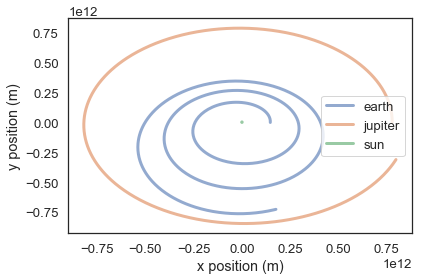

In [12]:
plot_trajectory(results1)

In [13]:
system = System(init=init,
                G=6.674e-11,
                m_s=1.989e30, 
                m_e=5.972e24,
                t_0=0,
                t_end= 378400000,
                m_j_init = 1.898e27,
                dt = 100000)

,values
init,x_e 1.470000e+11 y_e 0.000000e+00 vx_e...
G,6.674e-11
m_s,1.989e+30
m_e,5.972e+24
t_0,0
t_end,378400000
m_j_init,1.898e+27
dt,100000


In [14]:
%time results2 = run_simulation(system, update_func)

Wall time: 13.7 s


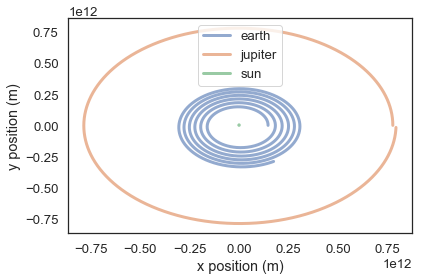

In [15]:
plot_trajectory(results2)

In [16]:
%time results3 = run_simulation(system, update_func2)

Wall time: 14 s


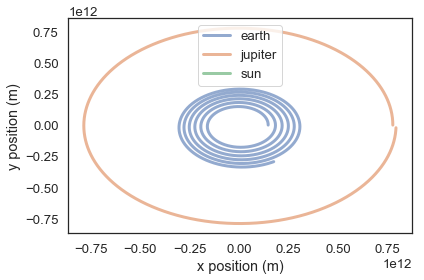

In [17]:
plot_trajectory(results3)

In [18]:
init = State(x_e = r_e, y_e = 0 , vx_e = 0 , vy_e = 29784,
             x_s = 0 , y_s = 0 , vx_s = 0 , vy_s = 0 ,
             x_j = -r_j, y_j = 0 , vx_j = 0 , vy_j = -13069 , m_j = init_jupiter_mass)

system = System(init=init,
                G=6.674e-11,
                m_s=1.989e30, 
                m_e=5.972e24,
                t_0=0,
                t_end= 3.784e+8,
                m_j_init = 1.898e27,
                dt = 300000)

,values
init,x_e 1.470000e+11 y_e 0.000000e+00 vx_e...
G,6.674e-11
m_s,1.989e+30
m_e,5.972e+24
t_0,0
t_end,3.784e+08
m_j_init,1.898e+27
dt,300000


Wall time: 4.51 s


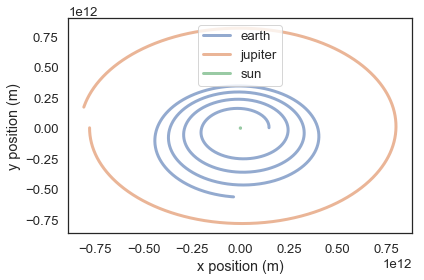

In [19]:
%time results4 = run_simulation(system, update_func)
plot_trajectory(results4)

Wall time: 4.72 s


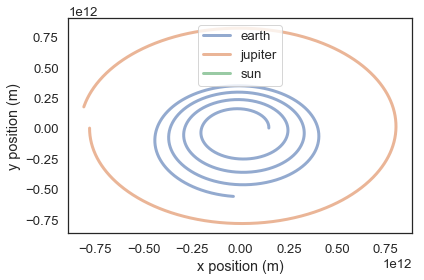

In [20]:
%time results5 = run_simulation(system, update_func2)
plot_trajectory(results5)

In [21]:
init = State(x_e = r_e, y_e = 0 , vx_e = 0 , vy_e = 29784,
             x_s = 0 , y_s = 0 , vx_s = 0 , vy_s = 0 ,
             x_j = 0, y_j = r_j , vx_j = -13069 , vy_j = 0 , m_j = init_jupiter_mass)

system = System(init=init,
                G=6.674e-11,
                m_s=1.989e30, 
                m_e=5.972e24,
                t_0=0,
                t_end= 378400000,
                m_j_init = 1.898e27,
                dt = 10000)

,values
init,x_e 1.470000e+11 y_e 0.000000e+00 vx_e...
G,6.674e-11
m_s,1.989e+30
m_e,5.972e+24
t_0,0
t_end,378400000
m_j_init,1.898e+27
dt,10000


Wall time: 8min 37s


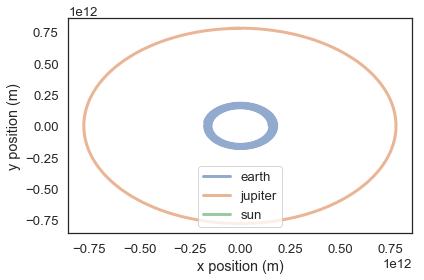

In [22]:
%time results6 = run_simulation(system, update_func2)
plot_trajectory(results6)